In [5]:
import sys
import os

# Add the root of the project to the path
source_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(source_path)

# init

In [9]:
import pandas as pd

source_file="icdar_train_df_20250514_175905.csv"
train_df = pd.read_csv(f"{source_path}\\outputs\\preprocessed_data\\{source_file}")
gw=45
prop=1
n_cc=1
sort_by="black_ratio"
running = 'new-laptop'
saved = 'old-laptop'
#i select the m patches per file that have the highest number of cc
m=5


In [10]:
train_df = pd.read_csv(f"{source_path}\\outputs\\preprocessed_data\\{source_file}")
train_df=file_IO.change_filename_from_to(train_df, fr=saved, to=running)

In [11]:
train_df.head()

,writer,isEng,same_text,file_name,male,train,index
0,1,0,0,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,0
1,1,0,1,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,1
2,1,1,0,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,2
3,1,1,1,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,3
4,2,0,0,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,4


# run

In [12]:
train_df_expanded = pd.DataFrame(sum(train_df.apply(image_processing.process_row, axis=1,args=(gw, n_cc,prop)), []))

train_df_expanded.head(10)

,writer,isEng,same_text,file_name,male,train,index,x,y,x2,y2,n_cc,black_ratio
0,1,0,0,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,0,2052,270,2106,324,2,0.000343
0,1,0,0,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,0,486,486,540,540,3,0.014403
0,1,0,0,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,0,594,486,648,540,4,0.040123
0,1,0,0,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,0,648,486,702,540,2,0.006859
0,1,0,0,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,0,702,486,756,540,2,0.014746
0,1,0,0,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,0,810,486,864,540,2,0.010631
0,1,0,0,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,0,864,486,918,540,2,0.005830
0,1,0,0,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,0,1026,486,1080,540,2,0.016461
0,1,0,0,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,0,1080,486,1134,540,2,0.013032
0,1,0,0,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,0,1134,486,1188,540,2,0.013374


In [13]:
train_df_expanded = train_df_expanded.reset_index(drop=True)
train_df_expanded.head(10)

,writer,isEng,same_text,file_name,male,train,index,x,y,x2,y2,n_cc,black_ratio
0,1,0,0,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,0,2052,270,2106,324,2,0.000343
1,1,0,0,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,0,486,486,540,540,3,0.014403
2,1,0,0,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,0,594,486,648,540,4,0.040123
3,1,0,0,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,0,648,486,702,540,2,0.006859
4,1,0,0,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,0,702,486,756,540,2,0.014746
5,1,0,0,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,0,810,486,864,540,2,0.010631
6,1,0,0,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,0,864,486,918,540,2,0.005830
7,1,0,0,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,0,1026,486,1080,540,2,0.016461
8,1,0,0,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,0,1080,486,1134,540,2,0.013032
9,1,0,0,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,0,1134,486,1188,540,2,0.013374


In [14]:
train_df_expanded_sorted = train_df_expanded.sort_values(by=sort_by, ascending=False)
train_df_expanded = train_df_expanded_sorted.groupby('file_name').head(m)   # Select top m patches per writer

In [15]:
train_df_expanded = train_df_expanded.sort_values(by='index')
train_df_expanded = train_df_expanded.reset_index(drop=True)
train_df_expanded.head(10)

,writer,isEng,same_text,file_name,male,train,index,x,y,x2,y2,n_cc,black_ratio
0,1,0,0,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,0,1836,1026,1890,1080,2,0.570645
1,1,0,0,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,0,1674,1026,1728,1080,3,0.479081
2,1,0,0,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,0,1782,1026,1836,1080,3,0.473594
3,1,0,0,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,0,1890,1026,1944,1080,2,0.465364
4,1,0,0,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,0,1620,1026,1674,1080,5,0.432785
5,1,0,1,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,1,540,1188,594,1242,7,0.192730
6,1,0,1,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,1,1944,1620,1998,1674,4,0.192387
7,1,0,1,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,1,486,1080,540,1134,4,0.227023
8,1,0,1,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,1,702,1620,756,1674,3,0.191701
9,1,0,1,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,1,1134,1620,1188,1674,5,0.198903


# Visual check

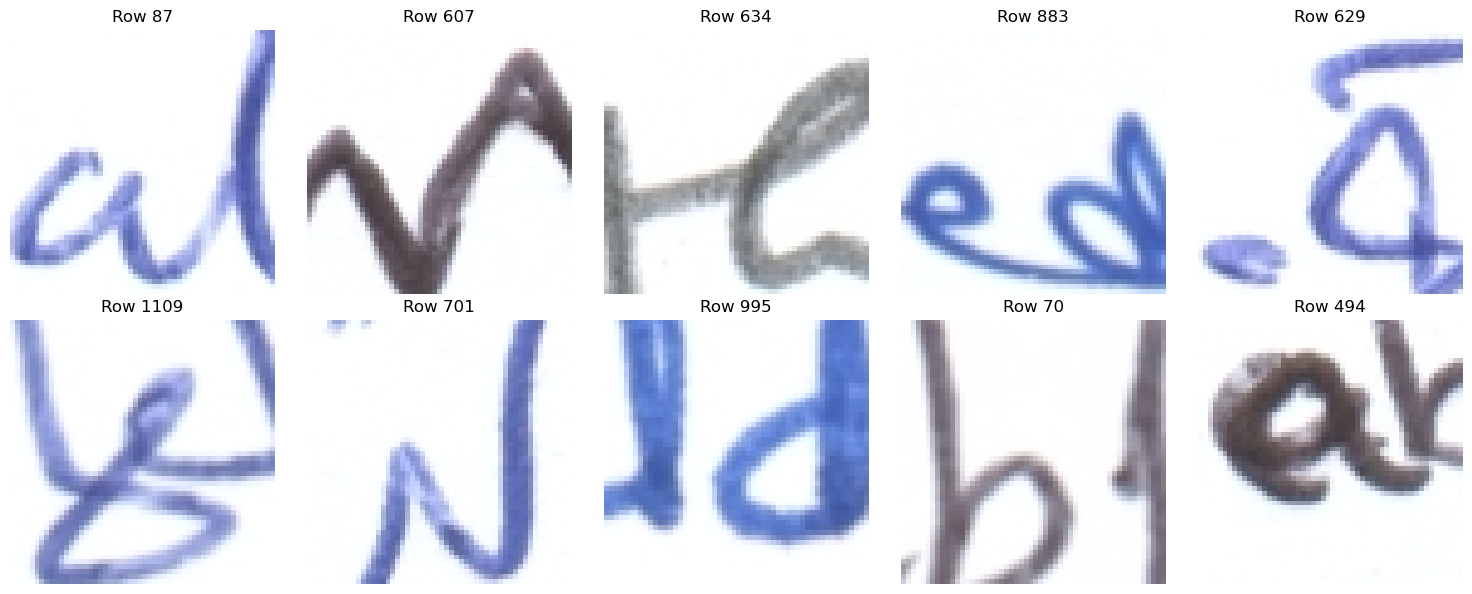

In [16]:
visualization.plot_cropped_sections(train_df_expanded)

In [17]:
train_df_expanded=file_IO.change_filename_from_to(train_df_expanded, fr=running, to=saved) #to be compatible with the other scripts

In [18]:
train_df_expanded.head(10)

,writer,isEng,same_text,file_name,male,train,index,x,y,x2,y2,n_cc,black_ratio
0,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,0,1836,1026,1890,1080,2,0.570645
1,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,0,1674,1026,1728,1080,3,0.479081
2,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,0,1782,1026,1836,1080,3,0.473594
3,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,0,1890,1026,1944,1080,2,0.465364
4,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,0,1620,1026,1674,1080,5,0.432785
5,1,0,1,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,1,540,1188,594,1242,7,0.192730
6,1,0,1,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,1,1944,1620,1998,1674,4,0.192387
7,1,0,1,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,1,486,1080,540,1134,4,0.227023
8,1,0,1,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,1,702,1620,756,1674,3,0.191701
9,1,0,1,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,1,1134,1620,1188,1674,5,0.198903


# tests

In [ ]:
index_counts = train_df_expanded['index'].value_counts()
all_counts_correct = (index_counts == m).all()
print(f"Each unique index appears {m} times: {all_counts_correct}")
if not all_counts_correct:
    print("Indices with incorrect counts:")
    print(index_counts[index_counts != m])

In [29]:
# The number of patches per writer, should be 5*4
len(train_df_expanded)/282

20.0

In [42]:
tests.check_randomization(train_df_expanded)
tests.check_grouping(train_df_expanded)
tests.check_occurrences(train_df_expanded,count=4*m)

Number of rows where train == 1: 15180
Fraction of rows where train == 1: 0.90
The train column is constant for all writers.
Each unique writer value occurs on exactly 60 rows.


In [35]:
import random
random_numbers = random.sample(range(1, len(train_df_expanded)), 10)
for n in random_numbers:
    print(n)
    print('first df \n', train_df_expanded.iloc[n])
    i=train_df_expanded['writer'][n]
    #print('writer', i)
    print(train_df[train_df['writer'] == i])
    print('-------------')

3763
first df 
 writer                                                       189
isEng                                                          0
same_text                                                      0
file_name      D:\download\PD project\datasets\ICDAR 2013 - G...
male                                                           0
train                                                          1
index                                                        752
x                                                            984
y                                                            492
x2                                                          1230
y2                                                           738
n_cc                                                          21
black_ratio                                             0.054977
Name: 3763, dtype: object
     writer  isEng  same_text  \
752     189      0          0   
753     189      0          1   
754     189   

# save

In [19]:
train_df_expanded['index']=train_df_expanded.index
train_df_expanded.head(10)

,writer,isEng,same_text,file_name,male,train,index,x,y,x2,y2,n_cc,black_ratio
0,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,0,1836,1026,1890,1080,2,0.570645
1,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,1,1674,1026,1728,1080,3,0.479081
2,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,2,1782,1026,1836,1080,3,0.473594
3,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,3,1890,1026,1944,1080,2,0.465364
4,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,4,1620,1026,1674,1080,5,0.432785
5,1,0,1,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,5,540,1188,594,1242,7,0.192730
6,1,0,1,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,6,1944,1620,1998,1674,4,0.192387
7,1,0,1,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,7,486,1080,540,1134,4,0.227023
8,1,0,1,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,8,702,1620,756,1674,3,0.191701
9,1,0,1,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,9,1134,1620,1188,1674,5,0.198903


In [20]:
from datetime import datetime

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
output_dir = os.path.join(source_path, "outputs", "preprocessed_data")
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn't exist

output_file = os.path.join(output_dir, f"icdar_train_df_patches_{timestamp}.csv")
train_df_expanded.to_csv(output_file, index=False)

print(f"Dataframe saved to {output_file}")

Dataframe saved to c:\Users\andre\VsCode\PD related projects\gender_detection\outputs\preprocessed_data\icdar_train_df_patches_20250610_120640.csv


In [21]:
# Example usage:
LOG_FILE = output_dir+"\\file_metadata_log.json"
print(f"Log file path: {LOG_FILE}")
print(f"Output file path: {output_file}")
file_IO.add_or_update_file(
    output_file, LOG_FILE,
    custom_metadata={
        #"seed": seed,
        "m patches": m,
        "source_file": source_file,
        "gw": gw,
        "n_cc":n_cc,
        "prop": prop,
        "sort_by": sort_by,
        "description": '''
        I am experimenting with decreasing progressively the patch size keeping 5 patches per writer.''' 
    }
)

Log file path: c:\Users\andre\VsCode\PD related projects\gender_detection\outputs\preprocessed_data\file_metadata_log.json
Output file path: c:\Users\andre\VsCode\PD related projects\gender_detection\outputs\preprocessed_data\icdar_train_df_patches_20250610_120640.csv
icdar_train_df_patches_20250610_120640.csv
Updated log for icdar_train_df_patches_20250610_120640.csv


In [22]:
file_IO.read_metadata(
    output_file,
    log_path=LOG_FILE
)

Metadata for icdar_train_df_patches_20250610_120640.csv:
full_path: c:\Users\andre\VsCode\PD related projects\gender_detection\outputs\preprocessed_data\icdar_train_df_patches_20250610_120640.csv
size_bytes: 969119
created: 2025-06-10T12:06:40.325363
modified: 2025-06-10T12:06:40.347739
accessed: 2025-06-10T12:06:40.347739
m patches: 5
source_file: icdar_train_df_20250514_175905.csv
gw: 45
n_cc: 1
prop: 1
sort_by: black_ratio
description: 
        I am experimenting with decreasing progressively the patch size keeping 5 patches per writer.


In [23]:
'''import pyarrow as pa
import pyarrow.parquet as pq
from datetime import datetime
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Your metadata
metadata = {
    'author': 'Andrea Morelli',
    'date': timestamp,
    'description': 'dividing images in 25th and counting the number of ccs, using a threshold of 10. I extract the 5 patches with more ccs for each unique file'
}

# Convert DataFrame to pyarrow Table
table = pa.Table.from_pandas(train_df_expanded)

# Convert metadata to bytes and attach to schema
# Parquet metadata must be a dict of bytes
meta_bytes = {k: str(v).encode('utf-8') for k, v in metadata.items()}
table = table.replace_schema_metadata(meta_bytes)

# Write to Parquet file
pq.write_table(table, 'icdar_train_df_cc_5patches_perName.parquet')'''

'import pyarrow as pa\nimport pyarrow.parquet as pq\nfrom datetime import datetime\ntimestamp = datetime.now().strftime("%Y%m%d_%H%M%S")\n\n# Your metadata\nmetadata = {\n    \'author\': \'Andrea Morelli\',\n    \'date\': timestamp,\n    \'description\': \'dividing images in 25th and counting the number of ccs, using a threshold of 10. I extract the 5 patches with more ccs for each unique file\'\n}\n\n# Convert DataFrame to pyarrow Table\ntable = pa.Table.from_pandas(train_df_expanded)\n\n# Convert metadata to bytes and attach to schema\n# Parquet metadata must be a dict of bytes\nmeta_bytes = {k: str(v).encode(\'utf-8\') for k, v in metadata.items()}\ntable = table.replace_schema_metadata(meta_bytes)\n\n# Write to Parquet file\npq.write_table(table, \'icdar_train_df_cc_5patches_perName.parquet\')'

# easy access

In [8]:
def reload_modules():
    import importlib
    import utils.image_processing as image_processing
    import utils.file_IO as file_IO
    import utils.visualization as visualization
    import utils.tests as tests

    importlib.reload(file_IO)
    importlib.reload(image_processing)
    importlib.reload(visualization)
    importlib.reload(tests)

    return image_processing, file_IO, visualization, tests
image_processing, file_IO, visualization, tests = reload_modules()